EDA

In [1]:
import pandas as pd 

In [9]:
# Step 1: Load the customer list 
labels = pd.read_csv("train_labels.csv")
# Step 2: Randomly select 1500 customers 
sample_customers = labels["customer_ID"].sample(1500, random_state=42).tolist()

In [12]:
# Step 3: read train_data in chunks and keep only selected customers 
chunksize = 1000000
sample_list = []

for chunk in pd.read_csv("train_data.csv", chunksize=chunksize):
    filtered = chunk[chunk["customer_ID"].isin(sample_customers)]
    sample_list.append(filtered)
    if sum(len(c) for c in sample_list) > 5000000:
        break 

train_sample = pd.concat(sample_list, ignore_index=True)
train_sample.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,000f8675ede66cc6affd4c048db11a00246d7ee623f453...,2017-03-20,0.715083,0.004744,0.004802,0.810619,0.009292,NaN,0.006632,0.004730,...,NaN,NaN,NaN,0.001829,0.000117,0.005113,NaN,0.009582,0.007047,0.005520
1,000f8675ede66cc6affd4c048db11a00246d7ee623f453...,2017-04-19,0.716266,0.004216,0.010257,0.812750,0.004828,NaN,0.004065,0.000054,...,NaN,NaN,NaN,0.006198,0.001686,0.000609,NaN,0.004941,0.006788,0.000395
2,000f8675ede66cc6affd4c048db11a00246d7ee623f453...,2017-05-20,0.718682,0.001832,0.006315,0.814431,0.008572,NaN,0.009506,0.001768,...,NaN,NaN,NaN,0.008982,0.003443,0.005090,NaN,0.003538,0.009285,0.004465
3,000f8675ede66cc6affd4c048db11a00246d7ee623f453...,2017-06-19,0.795518,0.004049,0.005613,0.817757,0.001017,NaN,0.003403,0.009862,...,NaN,NaN,NaN,0.006602,0.004418,0.009204,NaN,0.004931,0.005840,0.009581
4,000f8675ede66cc6affd4c048db11a00246d7ee623f453...,2017-07-20,0.797644,0.005360,0.010277,0.817901,0.009994,NaN,0.004238,0.001311,...,NaN,NaN,NaN,0.004932,0.002993,0.002550,NaN,0.005573,0.009770,0.003128


In [15]:
# Basic info about dataset
train_sample.info()
print(f"Rows: {train_sample.shape[0]:,}")
print(f"Columns: {train_sample.shape[1]}") 

# Number of unique customers 
n_customers = train_sample["customer_ID"].nunique() 
print(f"Unique customers: {n_customers:,}")

# Statements per customer (mean)
print(f"Average number of statements per customer: {train_sample.groupby('customer_ID').size().mean():.2f}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18074 entries, 0 to 18073
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 26.2+ MB
Rows: 18,074
Columns: 190
Unique customers: 1,500
Average number of statements per customer: 12.05


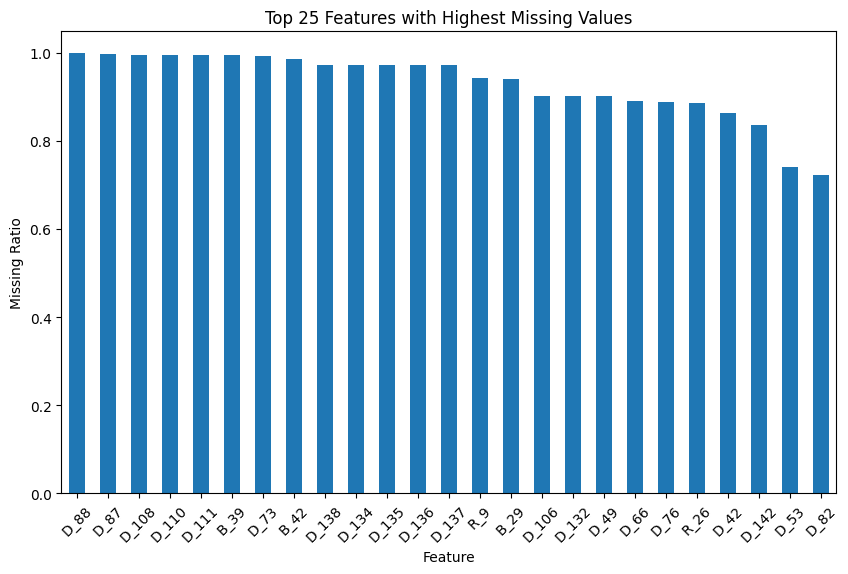

In [17]:
missing = (train_sample.isna().sum() / len(train_sample)).sort_values(ascending=False)
missing_df = missing.reset_index() # converts dataframe into 2 columns: one is feature name. another is missing ratio.
missing_df.columns = ['Feature', 'MissingRatio']
missing_df.head(20)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
missing.head(25).plot(kind='bar')
plt.title("Top 25 Features with Highest Missing Values")
plt.ylabel("Missing Ratio")
plt.xlabel("Feature")
plt.xticks(rotation=45)
plt.show()

In [22]:
high_missing = missing_df[missing_df["MissingRatio"] > 0.9]
print(f"Features with >90% missing: {len(high_missing)}")
high_missing.head(18) 

Features with >90% missing: 18


,Feature,MissingRatio
0,D_88,0.998395
1,D_87,0.998119
2,D_108,0.995186
3,D_110,0.994854
4,D_111,0.994854
5,B_39,0.994412
6,D_73,0.991701
7,B_42,0.986334
8,D_138,0.972723
9,D_134,0.972723


Drop these useless 13 columns: D_88, D_87, D_108, D_110, D_111, B_39, D_73, B_42, D_138, D_134, D_135, D_136, D_137, R_9, B_29, D_106, D_132, D_49

In [23]:
# Drop columns with >90% missing
cols_to_drop = high_missing["Feature"].tolist()
train_sample_clean = train_sample.drop(columns=cols_to_drop)

print(f"Dropped {len(cols_to_drop)} columns.")
print(f"Remaining columns: {train_sample_clean.shape[1]}")

Dropped 18 columns.
Remaining columns: 172


In [25]:
train_labels = pd.read_csv("train_labels.csv")
train_sample_merged = train_sample_clean.merge(train_labels, on="customer_ID", how="left")

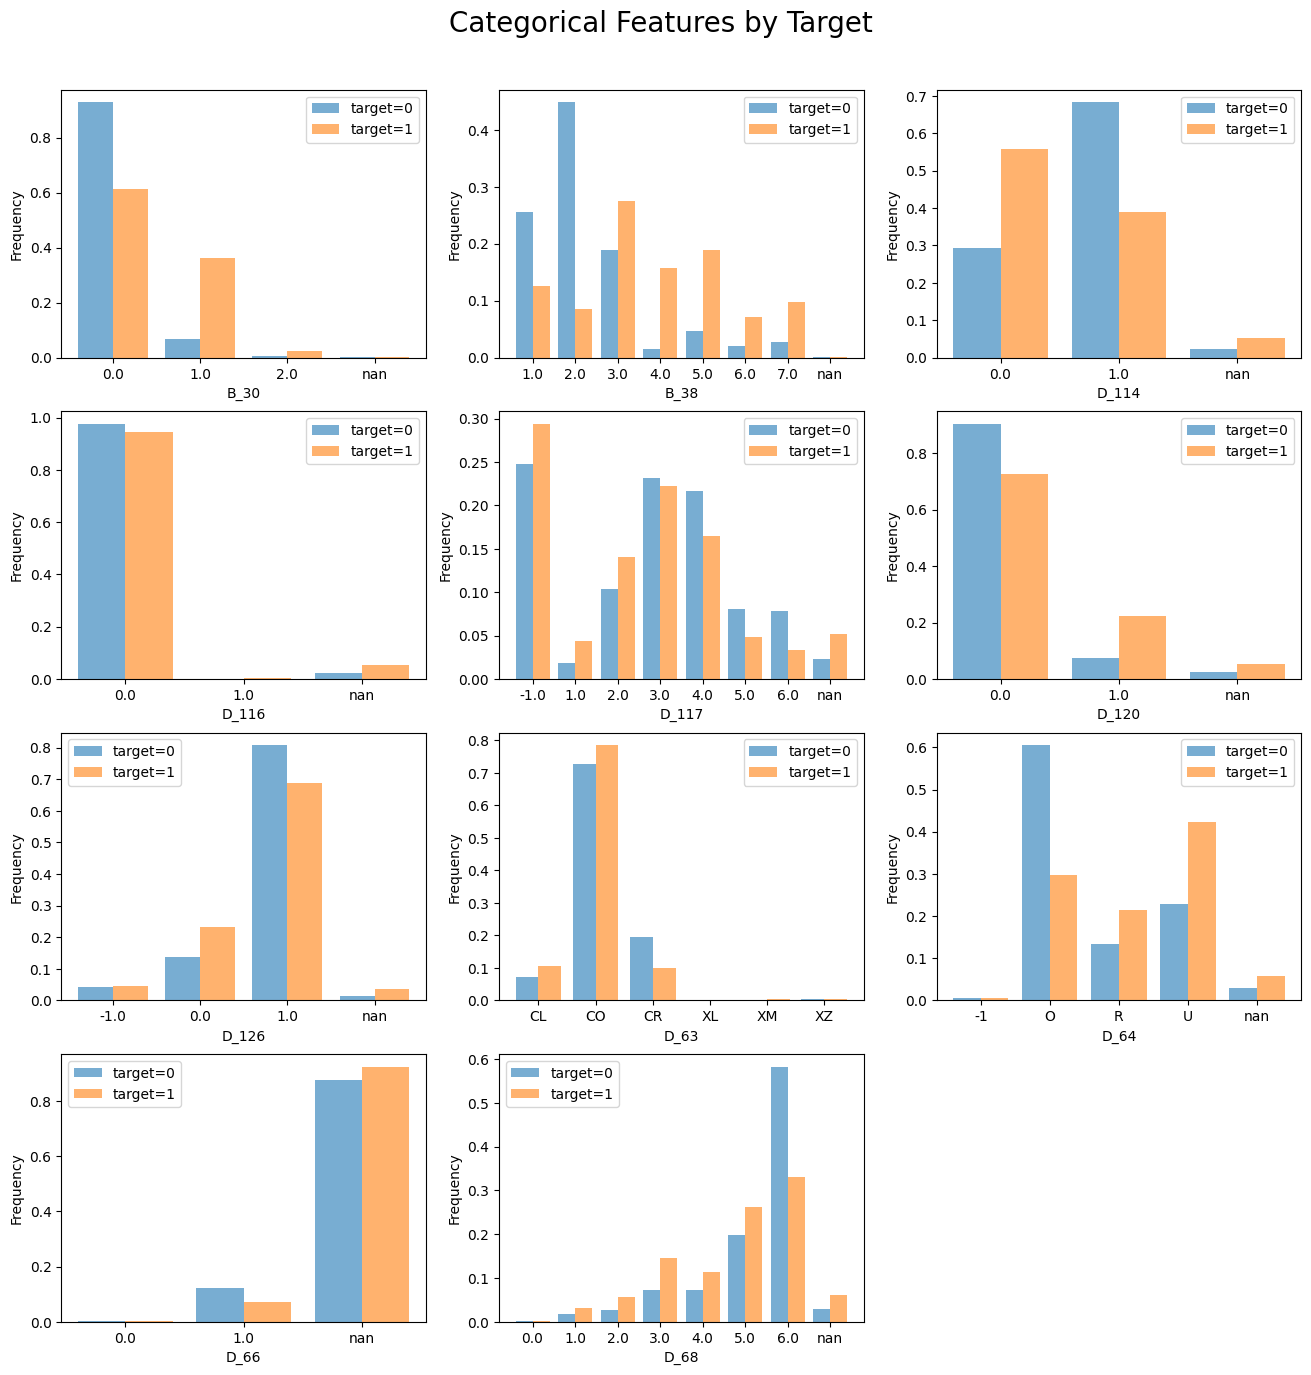

B_30: p-value = 0.0000
B_38: p-value = 0.0000
D_114: p-value = 0.0000
D_116: p-value = 0.0000
D_117: p-value = 0.0000
D_120: p-value = 0.0000
D_126: p-value = 0.0000
D_63: p-value = 0.0000
D_64: p-value = 0.0000
D_66: p-value = 0.3405
D_68: p-value = 0.0000


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 
                'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

plt.figure(figsize=(16, 16))

for i, f in enumerate(cat_features):
    plt.subplot(4, 3, i + 1)

    # Target = 0
    temp0 = pd.DataFrame(
        train_sample_merged[f][train_sample_merged.target == 0]
        .value_counts(dropna=False, normalize=True)
        .sort_index()
        .rename('count')
    )
    temp0.index.name = 'value'
    temp0.reset_index(inplace=True)
    plt.bar(temp0.index - 0.2, temp0['count'], width=0.4, alpha=0.6, label='target=0')

    # Target = 1
    temp1 = pd.DataFrame(
        train_sample_merged[f][train_sample_merged.target == 1]
        .value_counts(dropna=False, normalize=True)
        .sort_index()
        .rename('count')
    )
    temp1.index.name = 'value'
    temp1.reset_index(inplace=True)
    plt.bar(temp1.index + 0.2, temp1['count'], width=0.4, alpha=0.6, label='target=1')

    plt.xlabel(f)
    plt.ylabel('Frequency')
    plt.legend()
    plt.xticks(temp0.index, temp0.value)

plt.suptitle('Categorical Features by Target', fontsize=20, y=0.93)
plt.show()

from scipy.stats import chi2_contingency

for f in cat_features:
    contingency = pd.crosstab(train_sample_merged[f], train_sample_merged['target'])
    chi2, p, _, _ = chi2_contingency(contingency)
    print(f"{f}: p-value = {p:.4f}")

This shows that these features are very strongly associated with default risk as their category distributions differ substatially btw defaulters and non-defaulters. These are important for modelling.

In [28]:
cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117',
                'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

num_features = [
    col for col in train_sample_merged.columns
    if col not in ['customer_ID', 'S_2', 'target'] + cat_features
]
print(f"{len(num_features)} numerical features detected")


159 numerical features detected


In [34]:
from scipy.stats import ks_2samp
import pandas as pd

ks_results = []

for f in num_features:
    group0 = train_sample_merged.loc[train_sample_merged['target'] == 0, f].dropna()
    group1 = train_sample_merged.loc[train_sample_merged['target'] == 1, f].dropna()
    if len(group0) > 0 and len(group1) > 0:
        ks_stat, p = ks_2samp(group0, group1)
        ks_results.append((f, ks_stat, p))

ks_df = pd.DataFrame(ks_results, columns=['Feature', 'KS_statistic', 'p_value'])
ks_df = ks_df.sort_values('KS_statistic', ascending=False)

ks_df.head(159)


,Feature,KS_statistic,p_value
0,P_2,0.641674,0.000000e+00
17,D_48,0.571635,0.000000e+00
10,D_44,0.571144,0.000000e+00
23,B_9,0.552988,0.000000e+00
73,D_77,0.546800,5.484129e-321
...,...,...,...
108,R_22,0.013092,6.089186e-01
100,S_19,0.013037,6.143062e-01
131,D_109,0.011591,7.541260e-01
98,R_18,0.010598,8.418418e-01


In [36]:
# Define thresholds
strong_features = ks_df[ks_df["KS_statistic"] > 0.30]["Feature"].tolist()
moderate_features = ks_df[
    (ks_df["KS_statistic"] >= 0.15) & (ks_df["KS_statistic"] <= 0.30)
]["Feature"].tolist()

# Print summary
print(f"Strong features (KS > 0.30): {len(strong_features)}")
print(f"Moderate features (0.15 <= KS <= 0.30): {len(moderate_features)}")

# Combine them into one list for modeling
selected_features = strong_features + moderate_features
print(f"Total selected numerical features: {len(selected_features)}")

print("Strong features (>0.30):")
print(strong_features)

print("\nModerate features (0.15–0.30):")
print(moderate_features)

Strong features (KS > 0.30): 44
Moderate features (0.15 <= KS <= 0.30): 41
Total selected numerical features: 85
Strong features (>0.30):
['P_2', 'D_48', 'D_44', 'B_9', 'D_77', 'B_3', 'B_18', 'B_7', 'B_2', 'B_23', 'D_75', 'B_1', 'B_33', 'B_37', 'D_55', 'B_20', 'D_61', 'B_6', 'D_76', 'B_10', 'B_11', 'D_74', 'D_62', 'B_4', 'B_40', 'D_42', 'D_58', 'B_16', 'B_19', 'D_45', 'B_25', 'B_8', 'D_52', 'S_3', 'B_22', 'B_28', 'S_7', 'B_14', 'D_50', 'S_22', 'D_43', 'D_47', 'D_70', 'R_26']

Moderate features (0.15–0.30):
['D_51', 'B_17', 'D_46', 'R_1', 'D_53', 'P_3', 'R_3', 'D_128', 'R_27', 'D_115', 'S_24', 'D_56', 'D_121', 'D_122', 'S_8', 'D_39', 'D_129', 'S_25', 'D_118', 'D_119', 'S_23', 'D_113', 'S_5', 'P_4', 'B_12', 'B_5', 'S_27', 'D_59', 'D_104', 'D_107', 'D_103', 'D_78', 'D_142', 'S_15', 'D_102', 'D_60', 'D_131', 'D_71', 'D_79', 'D_130', 'D_41']


In [37]:
import json
with open("selected_features.json","w") as f:
    json.dump(selected_features, f)
selected_cat_features = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117','D_120', 'D_126', 'D_63', 'D_64', 'D_68']
with open("selected_cat_features.json","w") as f:
    json.dump(selected_cat_features, f)
print(f"Saved {len(selected_features)} numerical features to selected_features.json and 10 categorical features to selected_cat_features.json")

Saved 85 numerical features to selected_features.json and 10 categorical features to selected_cat_features.json
